In [2]:
import numpy as np 
import pandas as pd 
from scipy.stats import binom

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [45]:
listings = pd.read_csv('By_Rotation_listings.csv')
listings['prob'] = 1/34
listings.head(9)

,Product ID,Product Name,Product Price,Product Category,Product Brand,Product Views,Product Likes,prob
0,1,Asymmetric dress,200,Dress,See By Chloe,48,0,0.029412
1,2,Pleat dress,150,Dress,Reiss,33,2,0.029412
2,3,Matelasse mini bag,1050,Bag,Miu Miu,70,1,0.029412
3,4,Lace Skirt,95,Skirt,Self Portrait,42,0,0.029412
4,5,Chermeuse dress,210,Dress,Nanushka,74,2,0.029412
5,6,Silk blouse,124,Shirt,Maggie Marilyn,21,0,0.029412
6,7,Rockstud pumps,500,Heels,Valentino,107,5,0.029412
7,8,Pouch clutch,1900,Bag,Bottega Veneta,251,8,0.029412
8,9,Saffiano shoulder bag,500,Bag,Prada,164,19,0.029412


(0.0, 1.0)

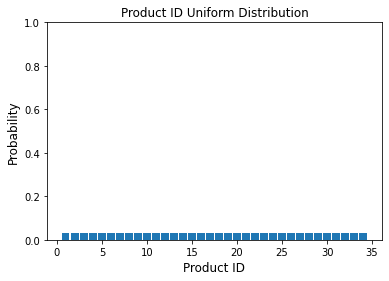

In [54]:
probs = np.full((34), 1/34)
face = (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34)
plt.bar(face, probs)
plt.ylabel('Probability', fontsize=12)
plt.xlabel('Product ID', fontsize=12)
plt.title('Product ID Uniform Distribution', fontsize=12)
axes = plt.gca()
axes.set_ylim([0,1])

In [18]:
import matplotlib.pyplot as plt

In [72]:
sales = pd.read_csv('By_Rotation_Sales.csv')
sales = sales.loc[:, ~sales.columns.str.contains('^Unnamed')]
sales['Rent Start Date'] = pd.to_datetime(sales['Rent Start Date'])
sales['TotalSales'] = sales.groupby(['Product ID'])['Rent Paid'].transform(sum)
sales.head(15)

,Product ID,Rent Price,Rent Start Date,Rent Paid,Discount,TotalSales
0,9,26,2022-03-19,22.10,No,187.85
1,9,26,2022-04-10,22.10,No,187.85
2,9,182,2022-04-27,55.25,Yes,187.85
3,9,52,2022-05-27,44.20,No,187.85
4,9,26,2022-06-02,22.10,No,187.85
5,21,39,2022-06-15,33.15,No,66.30
6,10,25,2022-06-18,21.25,No,21.25
7,16,84,2022-07-07,71.40,No,71.40
8,26,19,2022-08-06,16.15,No,16.15
9,19,23,2022-08-12,19.55,No,19.55


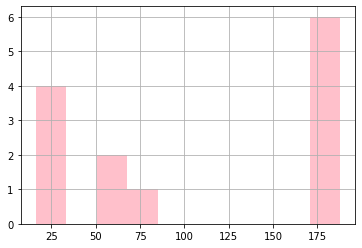

In [82]:
sales['TotalSales'].hist(color='pink')
plt.show()

In [68]:
sales2 = sales.groupby('Product ID').sum()
sales2.drop(['Rent Price', 'TotalSales'], axis=1, inplace=True)
sales2.head()

,Rent Paid
Product ID,
9,187.85
10,21.25
14,17.00
16,71.40
19,19.55


In [30]:
result = sales.dtypes

print("Output:")
print(result)

Output:
Product ID                  int64
Rent Price                  int64
Rent Start Date    datetime64[ns]
Rent Paid                 float64
Discount                   object
dtype: object


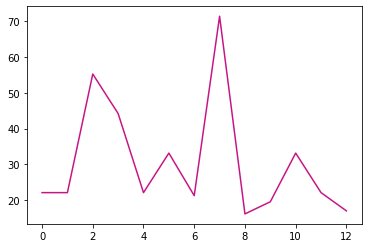

In [83]:
#https://medium.com/p/b5eb22114275
sales['Rent Paid'].plot(color='mediumvioletred') 
plt.show()

In [34]:
#https://www.kaggle.com/code/discdiver/testing-prophet-for-time-series-prediction
sales1= sales[['Rent Start Date', 'Rent Paid']]
sales1 = sales1.rename(columns={'Rent Start Date': 'ds', 'Rent Paid': 'y'})
sales1.head()

,ds,y
0,2022-03-19,22.10
1,2022-04-10,22.10
2,2022-04-27,55.25
3,2022-05-27,44.20
4,2022-06-02,22.10


In [38]:
train = sales1[:24]
train.tail()

,ds,y
8,2022-08-06,16.15
9,2022-08-12,19.55
10,2022-08-28,33.15
11,2022-09-03,22.10
12,2022-10-07,17.00


In [74]:
listings_sales = listings.merge(sales, on='Product ID', how='outer')
listings_sales['TotalSales'] = listings_sales['TotalSales'].fillna(0)

listings_sales.head(40)

,Product ID,Product Name,Product Price,Product Category,Product Brand,Product Views,Product Likes,prob,Rent Price,Rent Start Date,Rent Paid,Discount,TotalSales
0,1,Asymmetric dress,200,Dress,See By Chloe,48,0,0.029412,NaN,NaT,NaN,NaN,0.00
1,2,Pleat dress,150,Dress,Reiss,33,2,0.029412,NaN,NaT,NaN,NaN,0.00
2,3,Matelasse mini bag,1050,Bag,Miu Miu,70,1,0.029412,NaN,NaT,NaN,NaN,0.00
3,4,Lace Skirt,95,Skirt,Self Portrait,42,0,0.029412,NaN,NaT,NaN,NaN,0.00
4,5,Chermeuse dress,210,Dress,Nanushka,74,2,0.029412,NaN,NaT,NaN,NaN,0.00
5,6,Silk blouse,124,Shirt,Maggie Marilyn,21,0,0.029412,NaN,NaT,NaN,NaN,0.00
6,7,Rockstud pumps,500,Heels,Valentino,107,5,0.029412,NaN,NaT,NaN,NaN,0.00
7,8,Pouch clutch,1900,Bag,Bottega Veneta,251,8,0.029412,NaN,NaT,NaN,NaN,0.00
8,9,Saffiano shoulder bag,500,Bag,Prada,164,19,0.029412,26.0,2022-03-19,22.10,No,187.85
9,9,Saffiano shoulder bag,500,Bag,Prada,164,19,0.029412,26.0,2022-04-10,22.10,No,187.85


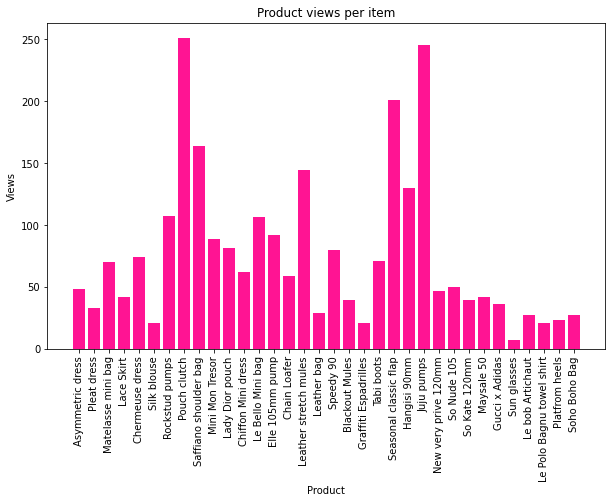

In [79]:
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(listings_sales["Product Name"], listings_sales["Product Views"], color="deeppink")
plt.title("Product views per item") 
plt.xlabel("Product")
plt.ylabel("Views") 
plt.xticks(rotation = 90)
plt.show()

In [84]:
#https://towardsdatascience.com/calculating-sales-conversion-using-bayesian-probability-b08f9fb262f2
months_on_app = 8
prada_sales = 6
conversion_rate = prada_sales/months_on_app
conversion_rate

0.75

In [48]:
weeks_of_listing = 36
prada_sales = 6
conversion_rate = prada_sales/weeks_of_listing
conversion_rate

0.16666666666666666

In [85]:
views = 164
prada_sales = 6
conversion_rate = prada_sales/views
conversion_rate

0.036585365853658534

In [ ]:
#https://towardsai.net/p/l/bayesian-inference-in-python
#Taking a grid of 1000 points between 0 and 1
probability_grid = np.linspace(0,1,num= 1000)
#As we have assumed a uniform distribution between 0 and 1 (i.e. uniform distribution across all 1000 grid points)
prior_probability = np.ones(1000)
plt.plot(prior_probability)

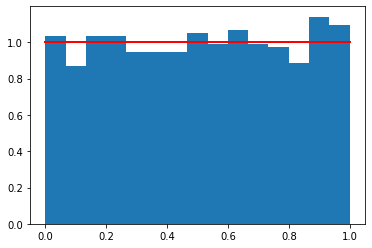

In [34]:
s = np.random.uniform(0,1,1000)
count, bins, ignored = plt.hist(s, 15, density=True)
plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
plt.show()

Text(0.5, 0.98, 'simulating 164 views 10,000 times')

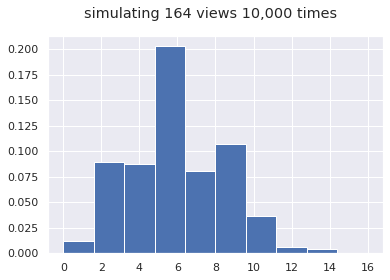

In [70]:
#https://www.youtube.com/watch?v=89ye2hfsAsk
import random
x = np.random.binomial(164, 0.036, 10000) #simulating 164 views 10,000 times with prob of conversion 0.036
plt.hist(x, density=True) # density defines frequency and not counts
plt.suptitle("simulating 164 views 10,000 times")

renting the bag 5 times has the most prob of 16%.

In [53]:
#if I get the prada bag for 300 views, with a prob of 0.036 of it being rented, what's the probability I'll rent it > 14 times?
sum(np.random.binomial(164, 0.036, 10000) >= 14)/10000

0.0032

Text(0.5, 0.98, 'simulating 8 months 10,000 times')

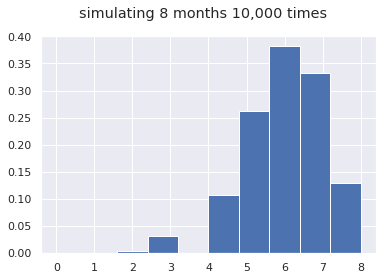

In [65]:
x = np.random.binomial(8, 0.75, 10000) #simulating 8 months 10,000 times with prob of conversion 0.75
plt.hist(x, density=True) # density defines frequency and not counts
plt.suptitle("simulating 8 months 10,000 times")

In [20]:
#if I list the prada bag for 8 more months with a prob of 0.75 of it being rented, what's the probability I'll rent it > 14 times?
sum(np.random.binomial(8, 0.75, 10000) >= 14)/10000

0.0

I need to rent the bag 14 more times to break even from the price I bought it but the probability of doing that in the next 8 months is 0

Text(0.5, 0.98, 'simulating 36 weeks 10,000 times')

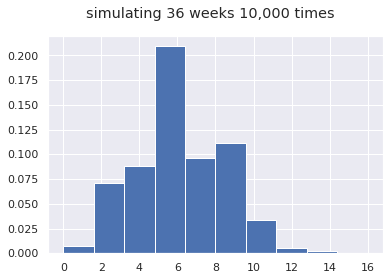

In [69]:
x = np.random.binomial(36, 0.166, 10000) #simulating 36 weeks 10,000 times with prob of conversion 0.166
plt.hist(x, density=True) # density defines frequency and not counts
plt.suptitle("simulating 36 weeks 10,000 times")

In [52]:
sum(np.random.binomial(36, 0.166, 10000) >= 14)/10000

0.0015

In [21]:
# conversion data
p_a = 0.036
N = 164
n_success_a = np.random.binomial(N, p_a)

In [ ]:
pip install pymc3 

In [27]:
# build model
import pymc3 as pm
with pm.Model() as Model:
  # prior on p
  prob = pm.Uniform('p')
  # binomial likelihood
  y = pm.Binomial('y', n=N, p=prob, observed=n_success_a)

In [38]:
# sample from posterior
with Model:
  samples = pm.sample(2000, cores=1) # njobsargument didn't work so set to cores

/usr/local/lib/python3.7/dist-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)


ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


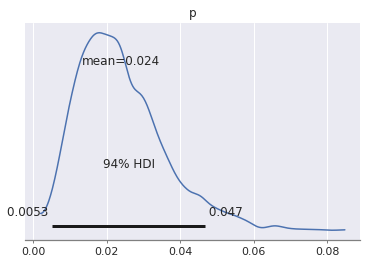

In [39]:
# plot posterior
pm.plot_posterior(samples);

ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


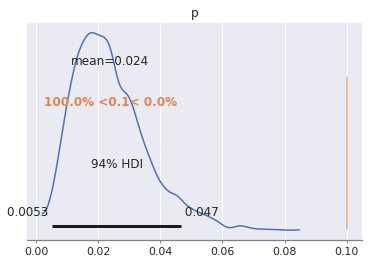

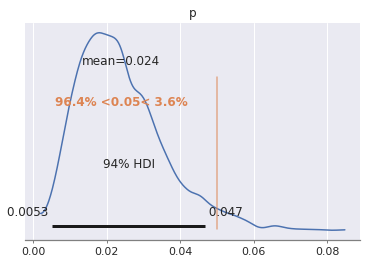

In [58]:
# how certain can you be that conversion is above 10%
pm.plot_posterior(samples, ref_val=0.10);
pm.plot_posterior(samples, ref_val=0.05);

The model developed given the data I know and the assumptions stated, I can be 0% certain that conversion is greater than 10% and 3.6%vsure its above 5%

In [23]:
# 1 = sell and 0 = not sell for prada bag
binom.rvs(1, 0.036, size=1)

array([0])

In [28]:
binom.rvs(1, 0.036, size=164)


array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0])